### Task 1
The `london_merged.csv` dataset concerns bike sharing in London.
1. Perform a **linear regression** in which the dependent variable is the `cnt` column (exclude the first column from the analyzes).
2. From the `timestamp` column, create `hour` and `year` columns.
3. Indicate which **regression parameters** are significant at the 0.05 significance level.
4. Show **correlations** between all variables using a **heatmap**.
5. Divide the data by `year`, perform a separate regression analysis for each year.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/london_merged.csv',sep=',')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Ad. 1.

In [2]:
df1 = df.loc[:, df.columns != 'timestamp']
df1.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [3]:
y = df1['cnt']
X = df1.drop(labels=['cnt'],axis=1) 
X = (X - X.mean())/X.std() #standardization

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25) 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2: ', lr.score(X_test, y_test))

MAE (Mean Absolute Error): 680.717704034755
MSE (Mean Squared Error): 837817.9260874663
RMSE (Root Mean Squared Error): 915.323945981676
R^2:  0.2745121655527517


In [4]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).head(15)

,y_test,y_pred
9680,702,281.041419
2903,1853,857.487443
704,1704,1103.873298
15879,212,402.406569
5390,139,1027.211493
1066,1156,1601.153794
2746,3741,2039.441310
1164,1526,1136.231834
12036,1007,1406.432943
3429,118,1086.990991


Ad. 2.

In [5]:
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2


Ad. 3.

In [6]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params
p = results.pvalues
print('Parameters significant at 0.05 p-value:')
print(p[p<=0.05])

Parameters significant at 0.05 p-value:
const           0.000000e+00
t1              2.842620e-13
t2              1.922529e-02
hum             0.000000e+00
wind_speed      1.867415e-04
weather_code    6.381311e-03
is_holiday      4.446235e-08
is_weekend      6.296503e-41
season          6.821574e-18
dtype: float64


Ad. 4.

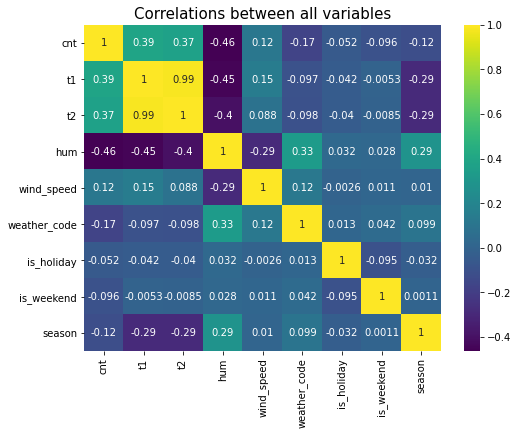

In [7]:
plt.figure(figsize = (8,6))
plt.title('Correlations between all variables', fontsize = 15)
sns.heatmap(df1.corr(), cmap = 'viridis', annot = True)
plt.show()

Ad. 5.

In [8]:
df2 = df.loc[:, df.columns != 'timestamp']
df2.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2


In [9]:
print('List of unique years: ', list(df2['year'].unique()))

List of unique years:  [2015, 2016, 2017]


In [10]:
years = list()
for year in df2['year'].unique():
    years.append(df2[df2.year == year])
years[2].head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
17342,933,7.5,5.0,84.5,14.0,3.0,0.0,1.0,3.0,2017,0
17343,895,7.0,5.0,87.0,10.0,3.0,0.0,1.0,3.0,2017,1
17344,339,7.0,4.0,87.0,16.0,4.0,0.0,1.0,3.0,2017,2


In [11]:
for year in years:
    y = year['cnt'] 
    X = year.drop(labels=['cnt'],axis=1) 
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25) 
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    
    print('Year: ', year['year'].iloc[0])
    print('- MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('- MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('- RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('- R^2: ', lr.score(X_test, y_test))
    print()

Year:  2015
- MAE: 642.3502600498281
- MSE: 769315.490636855
- RMSE: 877.1063166098253
- R^2:  0.30786022364318855

Year:  2016
- MAE: 684.3863185163116
- MSE: 944014.5240463963
- RMSE: 971.6040984096333
- R^2:  0.28396736933908195

Year:  2017
- MAE: 256.59269783416323
- MSE: 102514.36775457225
- RMSE: 320.17864974818707
- R^2:  -0.05960663103008379

